In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\pulki\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.Designation=df.Designation.str.replace('engineere','engineer')

In [5]:
df.shape

(3998, 39)

In [6]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [7]:
print(df.columns)

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [8]:
numerical_columns=['collegeGPA','English','Quant','Logical','10percentage','12percentage','Salary']

In [9]:
# Print summary statistics for each numerical column
print('Summary statistics for numerical columns:\n')
for col in numerical_columns:
    print(f'Summary statistics of {col}:')
    print('Max:', df[col].max())
    print('Min:', df[col].min())
    print('Mean:', df[col].mean())
    print('\n')

Summary statistics for numerical columns:

Summary statistics of collegeGPA:
Max: 99.93
Min: 6.45
Mean: 71.48617058529268


Summary statistics of English:
Max: 875
Min: 180
Mean: 501.64907453726863


Summary statistics of Quant:
Max: 900
Min: 120
Mean: 513.3781890945472


Summary statistics of Logical:
Max: 795
Min: 195
Mean: 501.59879939969983


Summary statistics of 10percentage:
Max: 97.76
Min: 43.0
Mean: 77.9254427213606


Summary statistics of 12percentage:
Max: 98.7
Min: 40.0
Mean: 74.46636568284127


Summary statistics of Salary:
Max: 4000000
Min: 35000
Mean: 307699.8499249625




# Univariate Analysis for Numerical Columns

<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

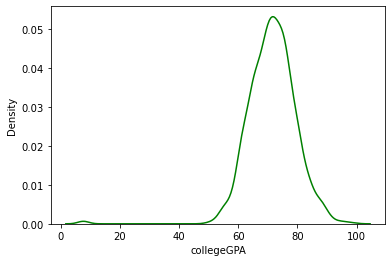

In [10]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.collegeGPA,color='green')

##### Majority of students scored ~70% in CollegeGPA.

<AxesSubplot:xlabel='English', ylabel='Density'>

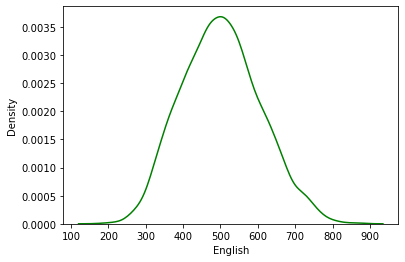

In [11]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.English,color='green')

##### Majority of students scored between 400-600 in English subject.

<AxesSubplot:xlabel='Quant', ylabel='Density'>

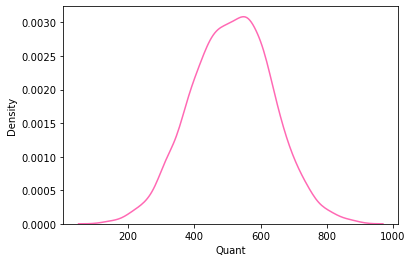

In [12]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.Quant,color='hotpink')

##### Majority of students scored between 400-600 in Quant subject.

<AxesSubplot:xlabel='Logical', ylabel='Density'>

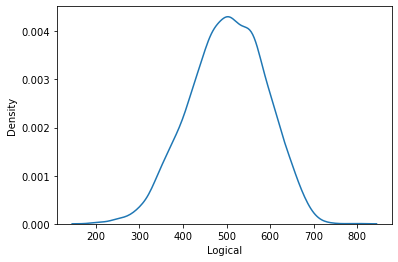

In [13]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.Logical)

##### Majority of students scored between 400-600 in Logical subject.

<AxesSubplot:xlabel='Salary', ylabel='Density'>

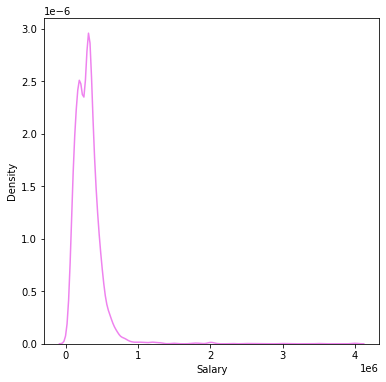

In [14]:
plt.figure(figsize=(6,6))
sns.kdeplot(df.Salary,color='violet')

<AxesSubplot:xlabel='10percentage', ylabel='Density'>

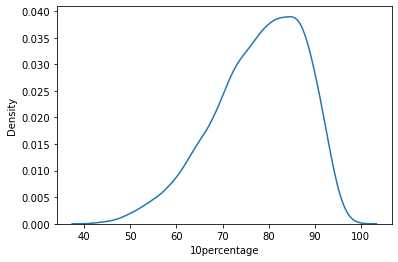

In [15]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['10percentage'])

##### Majority of students scored between 75% - 85% in Class 10.

<AxesSubplot:xlabel='12percentage', ylabel='Density'>

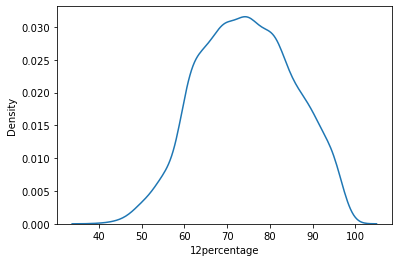

In [16]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['12percentage'])

##### Majority of students scored between 70% - 80% in Class 12.

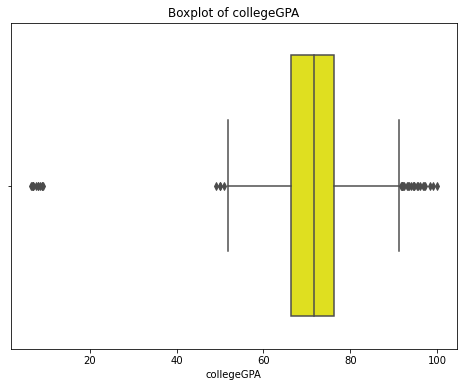

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['collegeGPA'], color='yellow')
plt.title(f'Boxplot of collegeGPA')
plt.xlabel('collegeGPA')
plt.show()

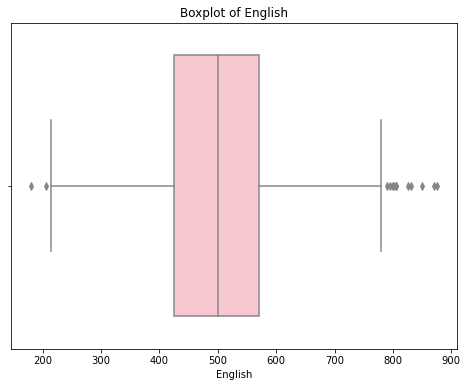

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['English'], color='pink')
plt.title(f'Boxplot of English')
plt.xlabel('English')
plt.show()

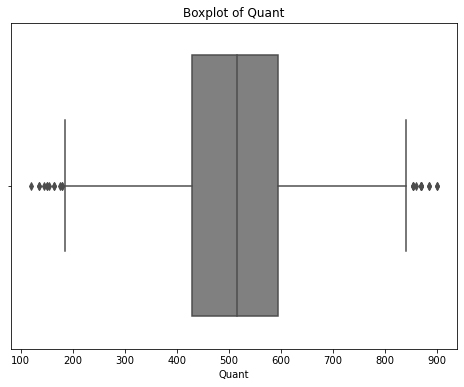

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quant'], color='grey')
plt.title(f'Boxplot of Quant')
plt.xlabel('Quant')
plt.show()

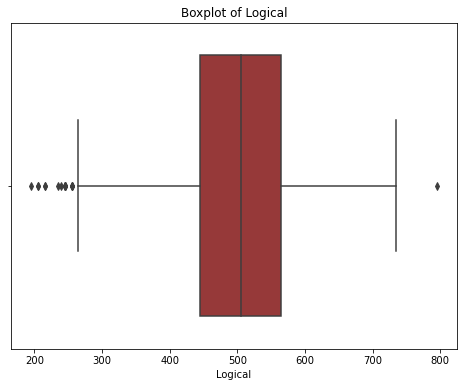

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Logical'], color='brown')
plt.title(f'Boxplot of Logical')
plt.xlabel('Logical')
plt.show()

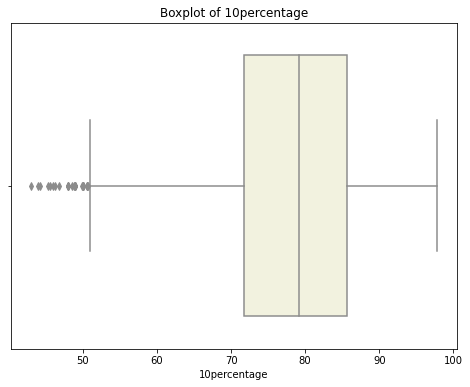

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['10percentage'], color='beige')
plt.title(f'Boxplot of 10percentage')
plt.xlabel('10percentage')
plt.show()

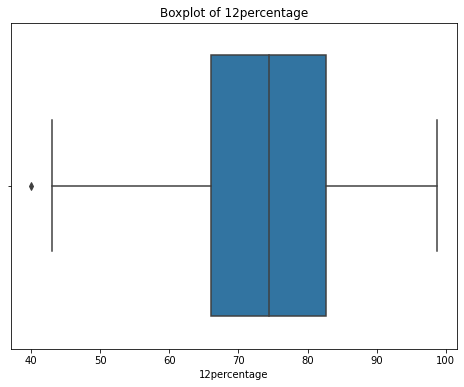

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['12percentage'])
plt.title(f'Boxplot of 12percentage')
plt.xlabel('12percentage')
plt.show()

# Univariate Analysis for Categorical Columns

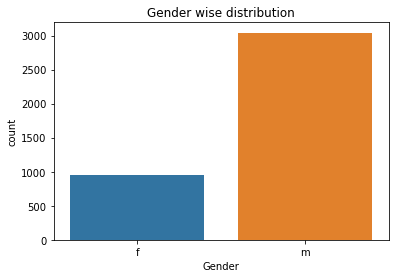

In [23]:
sns.countplot(x=df.Gender)
plt.title('Gender wise distribution')
plt.show()

##### Number of male students is exponentially higher than females.

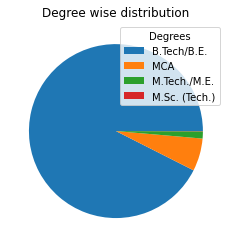

In [24]:
plt.pie(df['Degree'].value_counts())
plt.legend(df.Degree.unique(),title='Degrees')
plt.title('Degree wise distribution')
plt.show()

##### Majority number of students pursued B.Tech/B.E. as a degree.

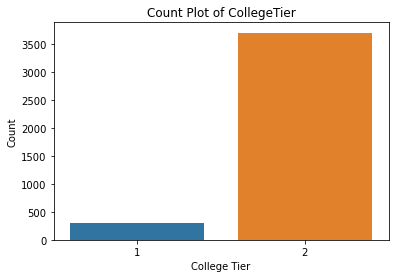

In [25]:
# Count plot for CollegeTier
sns.countplot(x=df.CollegeTier)
plt.title('Count Plot of CollegeTier')
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.show()

##### Majority students were from Tier 2 College.

In [26]:
df[df.JobCity!=-1].JobCity.value_counts().head()

Bangalore    627
Noida        368
Hyderabad    335
Pune         290
Chennai      272
Name: JobCity, dtype: int64

<AxesSubplot:>

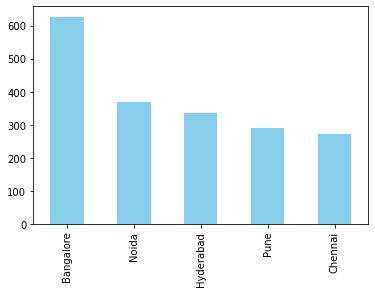

In [27]:
df[df.JobCity!=-1].JobCity.value_counts().head().plot(kind='bar',color='skyblue')

##### Majority students are from Bangalore followed by Noida, Hyderabad, Pune & Chennai

In [28]:
df.Designation.value_counts().head()

software engineer     540
software developer    265
system engineer       205
programmer analyst    139
systems engineer      118
Name: Designation, dtype: int64

<AxesSubplot:>

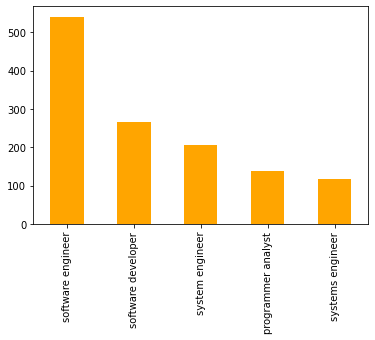

In [29]:
df.Designation.value_counts().head().plot(kind='bar',color='orange')

##### Top designations offered were software engineer,  software developer, system engineer, programmer analyst & systems engineer

# Bivariate Analysis

In [31]:
x=df.groupby(df.DOJ.dt.year).sum().reset_index()
x

,DOJ,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1991,611964,615000,71.00,2008,74.80,64,2,69.73,64,...,-1,-1,-1,-1,-1,-1.8825,-2.7846,-0.1437,0.90660,-1.0524
1,2004,220601,180000,86.40,2004,81.60,285,1,75.20,285,...,-1,-1,-1,-1,-1,-1.1901,1.1248,0.3817,-0.76030,0.6603
2,2006,958809,350000,83.40,2010,77.00,12289,2,76.00,12289,...,-1,-1,-1,-1,-1,-1.0208,-1.1196,-1.9881,-0.23440,-2.7769
3,2007,1712445,770000,312.50,8016,317.03,34137,8,285.28,34137,...,-4,-4,-4,-4,-4,-2.8362,-0.2848,-4.0210,1.02223,-1.9384
4,2008,918414,200000,49.00,2003,63.00,11476,2,88.00,11476,...,-1,-1,-1,-1,-1,-1.1644,-1.9521,-1.0659,0.52620,-1.4356
5,2009,1932523,780000,354.03,10018,308.80,5474,10,320.51,5474,...,-5,362,-5,-5,396,-0.9833,-1.7266,-2.3394,-2.32300,0.8093
6,2010,16769330,77440000,12753.69,332870,12202.97,339503,310,11880.91,339503,...,-166,6058,191,148,1078,-53.3820,14.8804,-18.7791,-19.57277,-0.1951
7,2011,85665344,147870000,29129.69,764287,27794.79,1082787,728,26403.59,1082787,...,914,8072,40,14167,1585,-99.5889,25.3490,-6.6544,-66.39556,-21.3683
8,2012,219647852,204255000,45430.88,1184204,43853.25,2445965,1149,42116.05,2445965,...,4655,12909,358,20314,794,-65.4264,121.1498,-86.1976,30.31250,-121.3808
9,2013,615156612,301409000,78766.18,2016092,75868.28,5172022,1928,72459.87,5172022,...,55136,22695,18127,36654,1104,-37.1852,172.2611,-44.7290,-149.38508,-178.1928


<AxesSubplot:xlabel='DOJ', ylabel='Salary'>

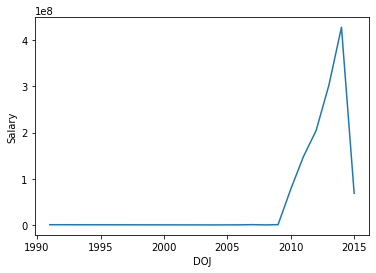

In [32]:
sns.lineplot(x = x['DOJ'], y = x.Salary)

#### Higher Salaries were provided during years 2011 - 2014

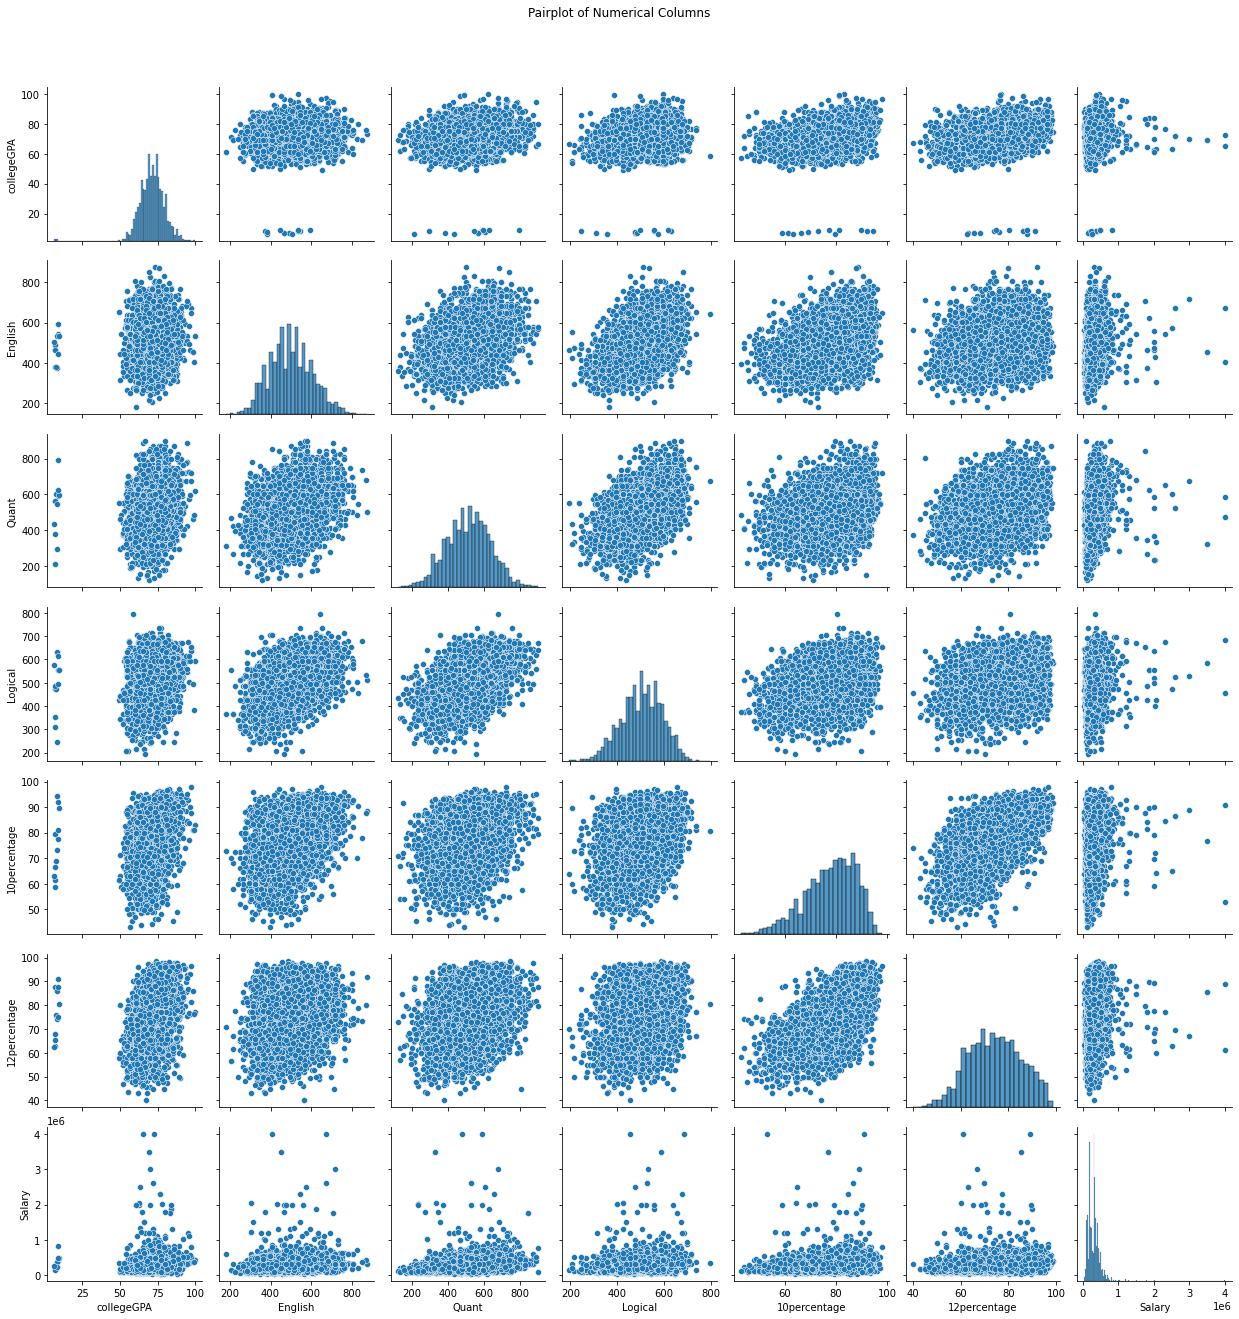

In [34]:
# Scatter plots
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.05)
plt.show()

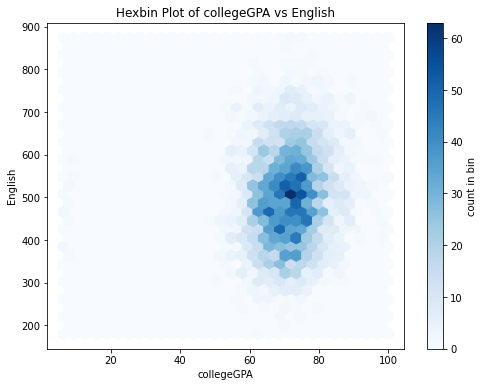

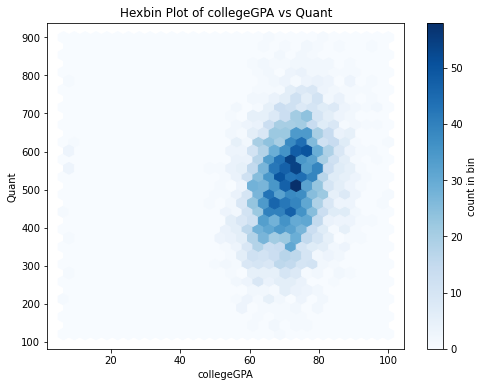

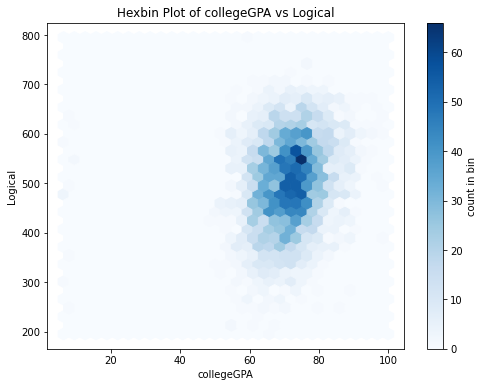

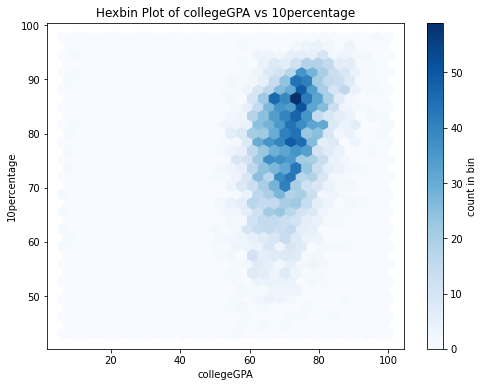

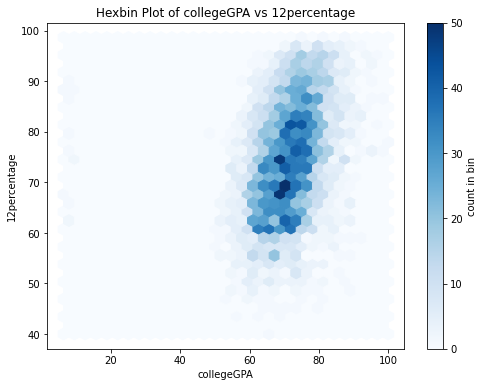

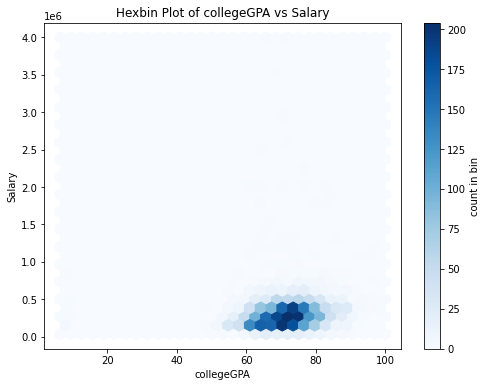

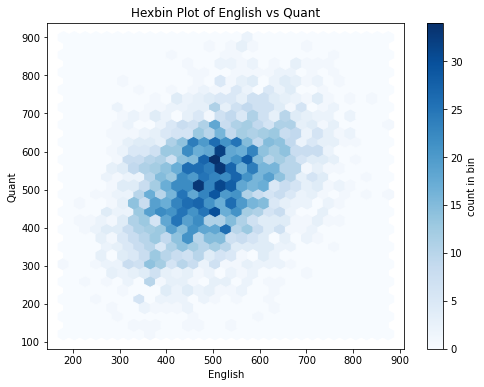

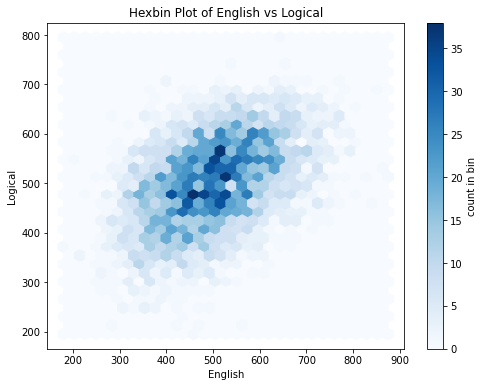

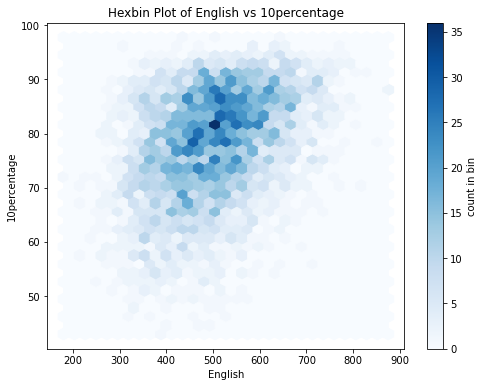

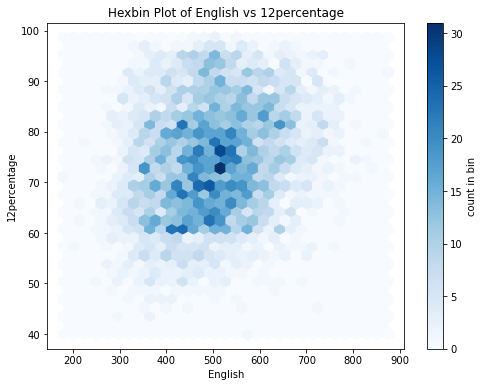

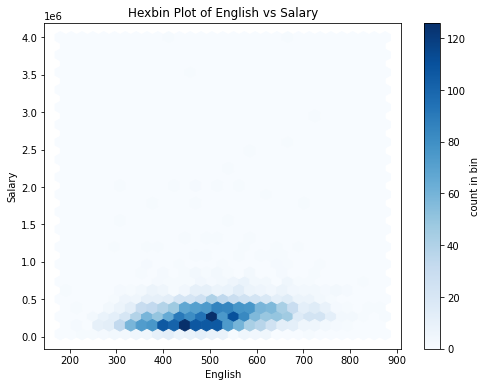

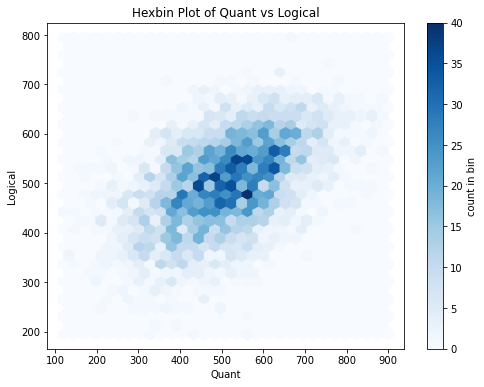

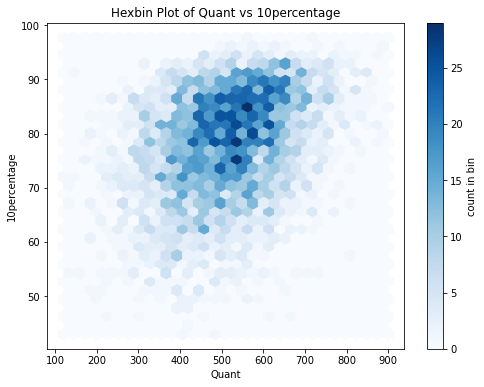

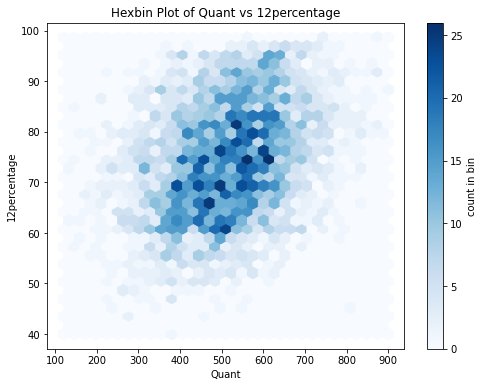

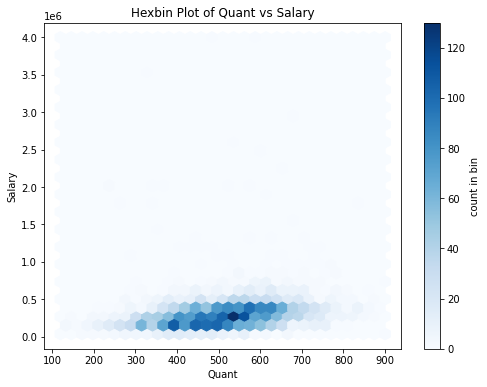

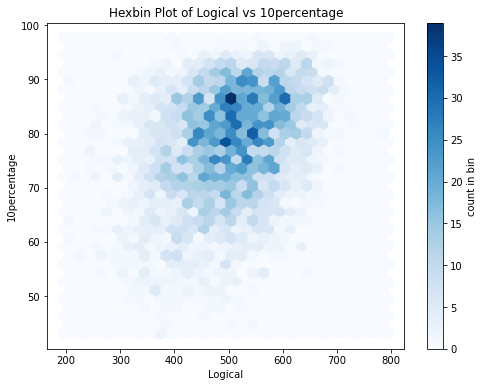

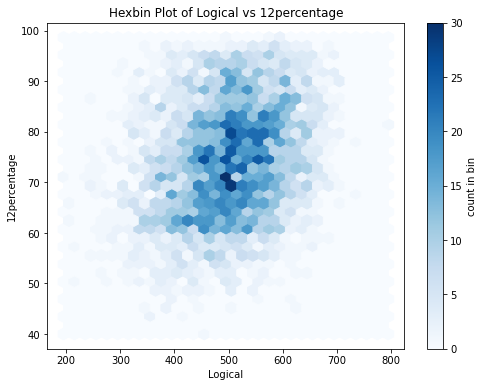

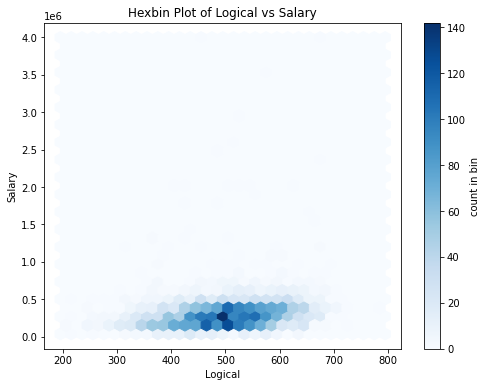

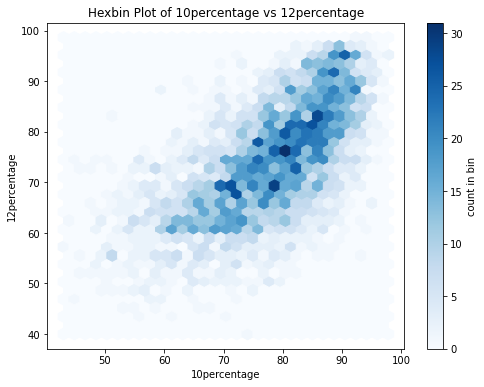

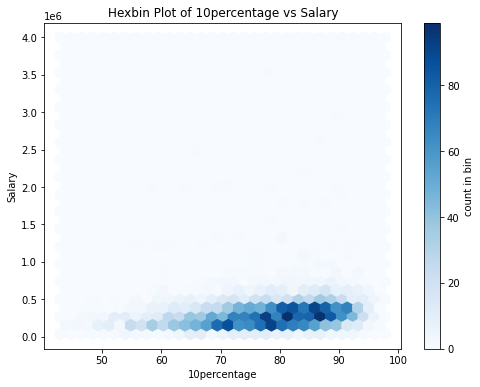

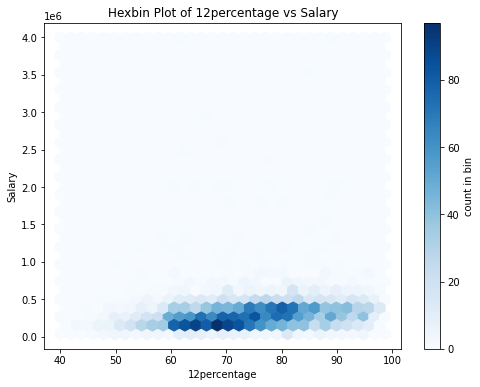

In [35]:
# Plot hexbin plots for unique pairs of numerical columns
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        plt.figure(figsize=(8, 6))
        plt.hexbin(df[col1], df[col2], gridsize=30, cmap='Blues')
        plt.colorbar(label='count in bin')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'Hexbin Plot of {col1} vs {col2}')
        plt.show()

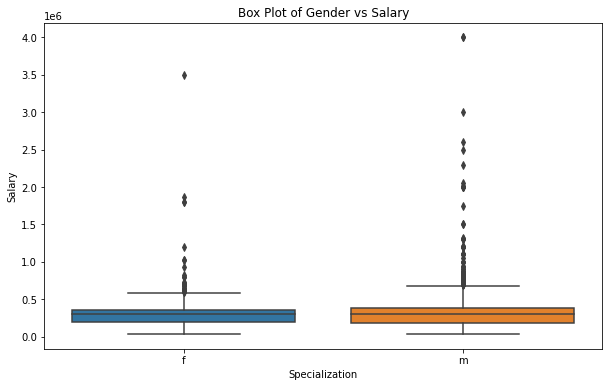

In [51]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df.Gender, y=df.Salary)
    plt.title(f'Box Plot of Gender vs Salary')
    plt.xlabel('Gender')
    plt.ylabel('Salary')
    plt.show()

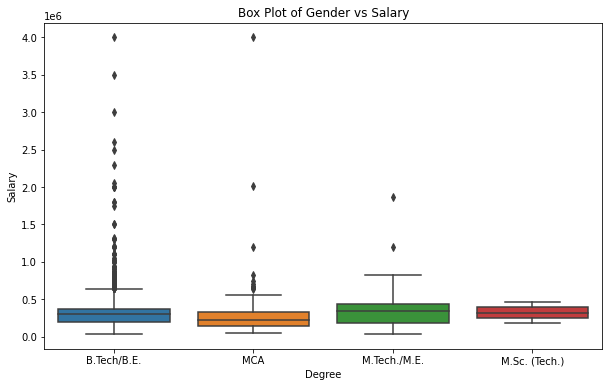

In [52]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df.Degree, y=df.Salary)
    plt.title(f'Box Plot of Gender vs Salary')
    plt.xlabel('Degree')
    plt.ylabel('Salary')
    plt.show()

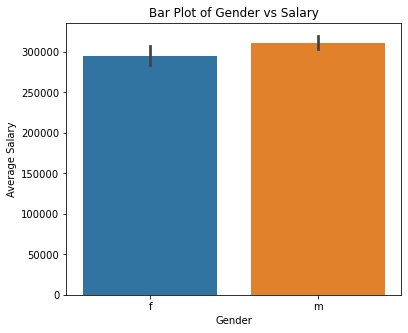

In [57]:
# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=df.Gender,y= df.Salary)
plt.title(f'Bar Plot of Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

##### Salaray packages of males were slightly higher than those of females

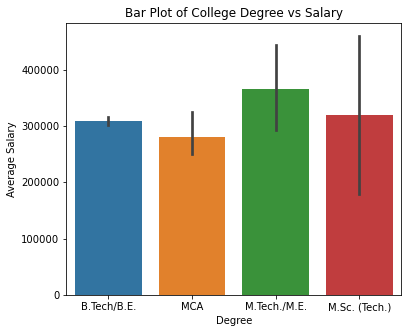

In [53]:
# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=df.Degree, y=df.Salary)
plt.title(f'Bar Plot of College Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Average Salary')
plt.show()

##### students who pursued M.Tech/M.E. got the highest packages followed by who pursued M.Sc(Tech.) & B.Tech/B.E.

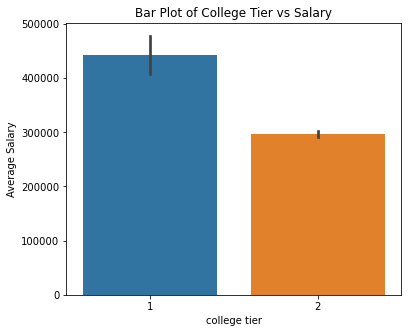

In [54]:
# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=df.CollegeTier,y= df.Salary)
plt.title(f'Bar Plot of College Tier vs Salary')
plt.xlabel('college tier')
plt.ylabel('Average Salary')
plt.show()

##### Tier 1 college students secured higher packages than Tier 2 college students

Research Questions
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [55]:
new = df[(df['Specialization']=='computer engineering') & ((df.Designation == 'programmer analyst') | (df.Designation == 'software engineer') | (df.Designation == 'hardware engineer')| (df.Designation == 'associate engineer'))].reset_index()
new.head()

,index,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,19,train,466888,325000,2014-09-01,present,software engineer,Pune,f,1990-11-30,...,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295
1,20,train,140069,320000,2010-11-01,2012-09-01 00:00:00,software engineer,Bangalore,f,1988-07-25,...,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444
2,36,train,602377,270000,2013-03-01,present,software engineer,Hyderabad,f,1992-08-21,...,-1,-1,-1,-1,-1,-1.0208,0.2124,0.4711,0.2727,-0.0943
3,44,train,247617,380000,2012-05-01,2015-04-01 00:00:00,programmer analyst,Bangalore,f,1989-01-06,...,-1,-1,-1,-1,-1,0.5100,0.6568,-0.6343,0.2973,0.1864
4,59,train,536053,120000,2009-09-01,2013-04-01 00:00:00,software engineer,Bangalore,m,1977-10-30,...,-1,366,-1,-1,400,-0.3014,-0.4353,-0.9245,-0.3490,-0.4455


In [64]:
# Filter data for Computer Science Engineering graduates with specified job titles
filtered_data = df[(df['Degree'] == 'B.Tech/B.E.') & 
                   (df['Specialization'].isin(['computer engineering', 'information technology', 'electronics and communication engineering', 'electronics and electrical engineering'])) &
                   (df['JobCity'] != -1) & 
                   (df['Designation'].isin(['Programmer Analyst', 'software engineer', 'hardware engineer', 'associate engineer']))]

# Calculate the median salary for filtered data
median_salary = filtered_data['Salary'].median()

# Compare with claimed salary range
claimed_range = (250000, 300000)
print(f"Median Salary for Computer Science Engineering Graduates in specified roles: {median_salary}")
print("Claimed Salary Range: 2.5-3 lakhs")
print("Claimed Range Met: ", claimed_range[0] <= median_salary <= claimed_range[1])


Median Salary for Computer Science Engineering Graduates in specified roles: 325000.0
Claimed Salary Range: 2.5-3 lakhs
Claimed Range Met:  False


In [69]:
print("average Salary for Computer Science Engineering Graduates in specified roles:",round(new.Salary.mean(),2))

average Salary for Computer Science Engineering Graduates in specified roles: 383860.29


### Since given range is 2.5-3 LPA and the average salary is >3.5 LPA, The claim stands to be False

In [74]:
# Create a crosstab to analyze the relationship between gender and specialization
gender_specialization_crosstab = pd.crosstab(df['Gender'], df['Specialization'])

In [78]:
# Perform chi-square test of independence
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(gender_specialization_crosstab)
print("Chi-square test p-value:", '{:.10f}'.format(p_value))

Chi-square test p-value: 0.0000012454


### there appears to be a relationship between gender and specialization based on the chi-square test results. The p-value obtained from the chi-square test is very small (approximately 0.0000012454), indicating that the association between gender and specialization preference is statistically significant.